# Adventure Works Cycles Customer Analysis

In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics.

In this project, we will handle three main tasks:

* Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
* Build a classification model to predict customer purchasing behavior.
* Build a regression model to predict customer purchasing behavior.

The data consists of three files.

AdvWorksCusts.csv
Customer demographic data consisting of the following fields:

* CustomerID (integer): A unique customer identifier.
* Title (string): The customer's formal title (Mr, Mrs, Ms, Miss Dr, etc.)
* FirstName (string): The customer's first name.
* MiddleName (string): The customer's middle name.
* LastName (string): The customer's last name.
* Suffix (string): A suffix for the customer name (Jr, Sr, etc.)
* AddressLine1 (string): The first line of the customer's home address.
* AddressLine2 (string): The second line of the customer's home address.
* City (string): The city where the customer lives.
* StateProvince (string): The state or province where the customer lives.
* CountryRegion (string): The country or region where the customer lives.
* PostalCode (string): The postal code for the customer's address.
* PhoneNumber (string): The customer's telephone number.
* BirthDate (date): The customer's date of birth in the format YYYY-MM-DD.
* Education (string): The maximum level of education achieved by the customer:
* Partial High School
* High School
* Partial College
* Bachelors
* Graduate Degree
* Occupation (string): The type of job in which the customer is employed:
       Manual
       Skilled Manual
       Clerical
       Management
       Professional
* Gender (string): The customer's gender (for example, M for male, F for female, etc.)
* MaritalStatus (string): Whether the customer is married (M) or single (S).
* HomeOwnerFlag (integer): A Boolean flag indicating whether the customer owns their own home (1) or not (0).
* NumberCarsOwned (integer): The number of cars owned by the customer.
* NumberChildrenAtHome (integer): The number of children the customer has who live at home.
* TotalChildren (integer): The total number of children the customer has.
* YearlyIncome (decimal): The annual income of the customer.

AW_AveMonthSpend.csv
Sales data for existing customers, consisting of the following fields:

* CustomerID (integer): The unique identifier for the customer.
* AveMonthSpend (decimal): The amount of money the customer spends with Adventure Works Cycles on average each month.

AW_BikeBuyer.csv
Sales data for existing customers, consisting of the following fields:

* CustomerID (integer): The unique identifier for the customer.
* BikeBuyer (integer): A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).

In [70]:
# Import the modules we need for the specified tasks

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Exploring The Data

In [2]:
# Read the files into a pandas dataframe

adventure_works = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AdvWorksCusts.csv")
aw_avmonthspend = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AW_AveMonthSpend.csv")
aw_bikebuyer = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AW_BikeBuyer.csv")

In [3]:
# Inspect the first five elements of adventure_works

adventure_works.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771


In [4]:
# Get more informations about adventure_works

adventure_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 23 columns):
CustomerID              16519 non-null int64
Title                   88 non-null object
FirstName               16519 non-null object
MiddleName              9534 non-null object
LastName                16519 non-null object
Suffix                  2 non-null object
AddressLine1            16519 non-null object
AddressLine2            276 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519

We see that columns like **Title**, **MiddleName**, **Suffix** and **AddressLine2** contain a lot of missing values. Therefore we can remove these columns. They certainly don't add much value to our analysis.

In [5]:
# Remove the specified columns
cols_to_remove = ['Title', 'MiddleName', 'Suffix', 'AddressLine2']
adventure_works = adventure_works.drop(cols_to_remove, axis=1)
adventure_works.columns

Index(['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City',
       'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber',
       'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus',
       'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome'],
      dtype='object')

In [6]:
# Check adventure_works once more
adventure_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 19 columns):
CustomerID              16519 non-null int64
FirstName               16519 non-null object
LastName                16519 non-null object
AddressLine1            16519 non-null object
City                    16519 non-null object
StateProvinceName       16519 non-null object
CountryRegionName       16519 non-null object
PostalCode              16519 non-null object
PhoneNumber             16519 non-null object
BirthDate               16519 non-null object
Education               16519 non-null object
Occupation              16519 non-null object
Gender                  16519 non-null object
MaritalStatus           16519 non-null object
HomeOwnerFlag           16519 non-null int64
NumberCarsOwned         16519 non-null int64
NumberChildrenAtHome    16519 non-null int64
TotalChildren           16519 non-null int64
YearlyIncome            16519 non-null int64
dtypes: int64(6), objec

The remaining columns don't contain missing values. Now we are going to handle duplicated values. If duplicated values are found, we will keep the most updated version. 

In [7]:
# Identify duplicates. We consider rows with identical first_name, last_name and birthdate as duplicates.
# We keep the most recent version

print("The duplicates to remove are: ")
print("-------------------------------")

adventure_works[adventure_works.duplicated(subset=['FirstName', 'LastName', 'BirthDate'], keep='last')].sort_values(axis=0, by='FirstName')

The duplicates to remove are: 
-------------------------------


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
3393,29333,Abby,Martinez,1023 Hawkins Street,Townsville,Queensland,Australia,4810,1 (11) 500 555-0150,1937-09-10,Bachelors,Management,F,S,0,2,0,2,58892
4463,18719,Alberto,Suarez,7289 Las Quebrados Ln,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0182,1964-10-20,Bachelors,Professional,M,M,1,3,4,4,106313
8081,20021,Alexander,Jones,5805 Nob Hill Drive,Haney,British Columbia,Canada,V2W 1W2,172-555-0116,1965-06-28,Bachelors,Skilled Manual,M,M,1,0,4,4,118085
7221,20202,Alexandra,Jones,4386 Ryan Rd.,Haney,British Columbia,Canada,V2W 1W2,642-555-0111,1959-12-02,Graduate Degree,Professional,F,M,1,3,5,5,90140
2057,13289,Alexandria,Coleman,6652 Birch Park Rd,Cliffside,British Columbia,Canada,V8Y 1L1,245-555-0181,1962-02-26,Partial College,Professional,F,M,1,3,4,5,81064
6459,26767,Alisha,Goel,3002 Carmel Drive,Rhodes,New South Wales,Australia,2138,1 (11) 500 555-0133,1957-10-25,Partial College,Skilled Manual,F,S,0,1,0,1,72107
4230,27046,Allison,Howard,8788 Green Leaf Drive,Downey,California,United States,90241,548-555-0110,1958-06-16,Partial College,Clerical,F,M,1,1,0,1,45275
34,11041,Amanda,Carter,5826 Escobar,Glendale,California,United States,91203,295-555-0145,1977-10-16,Partial College,Skilled Manual,F,M,1,2,0,0,78170
251,11279,Amanda,Cook,4098 Woodcrest Dr.,Everett,Washington,United States,98201,252-555-0177,1963-09-12,Partial College,Professional,F,M,1,1,0,0,85754
2989,14328,Andrea,Rogers,9669 Cynthia Dr.,Shawnee,British Columbia,Canada,V9B 2C3,830-555-0152,1976-08-08,High School,Skilled Manual,F,S,0,2,0,0,51443


There are 115 duplicates that we need to remove. From the previous table, we see that there are two rows for the customer *Amanda Cook*.

In [8]:
# Print the entries related to the customer 'Amanda Cook'
print("Entries for the customer 'Amanda Cook'")
print("--------------------------------------")
adventure_works[(adventure_works['FirstName'] == 'Amanda') & (adventure_works['LastName'] == 'Cook')]

Entries for the customer 'Amanda Cook'
--------------------------------------


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
251,11279,Amanda,Cook,4098 Woodcrest Dr.,Everett,Washington,United States,98201,252-555-0177,1963-09-12,Partial College,Professional,F,M,1,1,0,0,85754
252,11279,Amanda,Cook,9187 Vista Del Sol,Everett,Washington,United States,98201,252-555-0177,1963-09-12,Partial College,Professional,F,M,1,1,0,0,86138


The most recent version for this customer is the one with the index **252**. This is the entry we need to keep.

In [9]:
# We remove the duplicates and create a new dataframe adv_updated with no duplicates

adv_updated = adventure_works.drop_duplicates(subset=['FirstName', 'LastName', 'BirthDate'], keep='last')

Let's check if the results for *Amanda Cook* are the expected ones.

In [10]:
print("Index 252! The results are the expected ones")
print("--------------------------------------------")
adv_updated[(adv_updated['FirstName'] == 'Amanda') & (adv_updated['LastName'] == 'Cook')]

Index 252! The results are the expected ones
--------------------------------------------


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
252,11279,Amanda,Cook,9187 Vista Del Sol,Everett,Washington,United States,98201,252-555-0177,1963-09-12,Partial College,Professional,F,M,1,1,0,0,86138


In [11]:
# We check that the duplicates have been removed
print("Remaning Duplicates")

adv_updated[adv_updated.duplicated(subset=['FirstName', 'LastName', 'BirthDate'], keep='last')].sort_values(axis=0, by='FirstName')

Remaning Duplicates


,CustomerID,FirstName,LastName,AddressLine1,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome


In [12]:
# print the shape of the updated dataframe
adv_updated.shape

(16404, 19)

The new dataframe adv_updated contains now **16404** rows. We see that there are no remaining duplicates for the specified criterias. Let's have a look at the *aw_avmonthspend* dataframe.

In [13]:
# Print the first elements of aw_avmonthspend
aw_avmonthspend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [14]:
# Get more infos about aw_avmonthspend
aw_avmonthspend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID       16519 non-null int64
AveMonthSpend    16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


The dataframe *aw_avmonthspend* doesn't contain null values. What about the duplicates?

In [15]:
# Remove duplicated rows. We identify duplicated rows as rows with identical value for the CustomerID column

aw_avupdated = aw_avmonthspend.drop_duplicates(subset=['CustomerID'], keep='last')

# Check to see if the duplicates have been removed
aw_avupdated.duplicated(subset=['CustomerID']).value_counts()

False    16404
dtype: int64

After removing duplicated, we created a new dataframe *aw_updated* which contains no duplicates. This new dataframe has **16404** rows. 

We can inspect the dataframe *aw_bikebuyer* now.

In [16]:
# Print the first elements 
aw_bikebuyer.head()

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1


In [17]:
# Get general infos about the dataframe
aw_bikebuyer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 2 columns):
CustomerID    16519 non-null int64
BikeBuyer     16519 non-null int64
dtypes: int64(2)
memory usage: 258.2 KB


No null values have been identified. Let's check for duplicated values

In [18]:
aw_bikebuyer.duplicated(subset=['CustomerID'], keep = 'last').value_counts()

False    16404
True       115
dtype: int64

There are **115** duplicated values. We will remove them.

In [19]:
aw_bikebuyer_updated = aw_bikebuyer.drop_duplicates(subset=['CustomerID'], keep = 'last')

# Verify that the duplicated values have been removed
aw_bikebuyer_updated.duplicated(subset=['CustomerID']).value_counts()

False    16404
dtype: int64

We can now move forward with our analysis. We can start by finding the minimum AveMonthSpend

In [20]:
# Get summary statistics for aw_avupdated
aw_avupdated.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


Let's see the distribution in the BikeBuyer Column

In [21]:
vals = aw_bikebuyer_updated['BikeBuyer'].value_counts()
print("0: Non Bike Buyers")
print("1: Bike Buyers")
vals

0: Non Bike Buyers
1: Bike Buyers


0    10949
1     5455
Name: BikeBuyer, dtype: int64

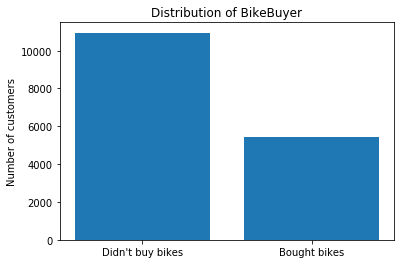

In [22]:
%matplotlib inline
plt.bar(x=["Didn't buy bikes", "Bought bikes"], height=vals)
plt.ylabel("Number of customers")
plt.title("Distribution of BikeBuyer")
plt.show()

It could be informative to rank the median YearlyIncome by Occupation. We will need to group the entries by the *Occupation* Column.

In [23]:
# Group by 'Occupation' on 'YearlyIncome' and sort the values in ascending order
print("Median YearlyIncome by Occupation")
print("---------------------------------")
adv_updated.groupby('Occupation')["YearlyIncome"].median().sort_values()

Median YearlyIncome by Occupation
---------------------------------


Occupation
Manual             21722.0
Clerical           49481.0
Skilled Manual     66471.5
Professional       99058.0
Management        118781.0
Name: YearlyIncome, dtype: float64

Regarding the the age of customers, which group of customers accounts for the highest AveMonthSpend values? Answering to this question could help us with our marketing campaign, in order to target the right customers. Let's do it!

In [24]:
# Inspect the format of BirthDate Colums
adv_updated['BirthDate'].head()

0    1966-04-08
1    1965-05-14
2    1965-08-12
3    1968-02-15
4    1968-08-08
Name: BirthDate, dtype: object

In [25]:
# We extract the year from the BirthDate Column
adv_updated['Year_of_birth'] = adv_updated['BirthDate'].str.split("-").str[0]
adv_updated['Year_of_birth'].head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    1966
1    1965
2    1965
3    1968
4    1968
Name: Year_of_birth, dtype: object

In [26]:
# Convert the 'Year of birth' into a float type
adv_updated['Year_of_birth'] = adv_updated['Year_of_birth'].astype(float)
# Check the type of Year_of_birth column
adv_updated['Year_of_birth'].dtype

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('float64')

These datas were collected in 1998. We will calculate the age of the customers at that period.

In [27]:
adv_updated['Age'] = 1998 - adv_updated['Year_of_birth']
# Print the first values for the *Age* column
adv_updated['Age'].head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    32.0
1    33.0
2    33.0
3    30.0
4    30.0
Name: Age, dtype: float64

Now we will create groups based on the age of the customers. We will have the following groups:
* Customers under 25 years of age
* Customers aged between 25 and 45
* Customers between 45 and 55
* Customers over 55 years of age

In [28]:
def assign_age_group(x):
    """The function will return 'Under 25 for customers below 25 years of age. 
    It will return 'Between 25 and 45 for customers between 25 and 45 years of age. 
    With the same logic, it will return 'Between 45 and 55', and 'Over 55' for other values
    """
    if x < 25:
        return "Under 25"
    elif 25 <= x < 45:
        return "Between 25 and 45"
    elif 45 <= x < 55:
        return "Between 45 and 55"
    else:
        return "Over 55"

# Create a new column named Age_group containing the customer's age group
adv_updated['Age_group'] = adv_updated['Age'].apply(assign_age_group)
adv_updated['Age_group'].head()   

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


0    Between 25 and 45
1    Between 25 and 45
2    Between 25 and 45
3    Between 25 and 45
4    Between 25 and 45
Name: Age_group, dtype: object

To get the category with the highest AvgMonthSpend, we need to join the dataframes adv_updated and aw_avupdated. The only columns we need from adv_updated are therefore **CustomerID, Age_group** and **Gender**.

In [29]:
cols_to_keep = ['CustomerID', 'Age_group', 'Gender']
# Join the two dataframes
df = pd.concat([adv_updated[cols_to_keep], aw_avupdated['AveMonthSpend']], axis=1)
df.head()

,CustomerID,Age_group,Gender,AveMonthSpend
0,11000,Between 25 and 45,M,89
1,11001,Between 25 and 45,M,117
2,11002,Between 25 and 45,M,123
3,11003,Between 25 and 45,F,50
4,11004,Between 25 and 45,F,95


In [30]:
# Group by **Age_group** and **Gender** on the **AveMonthSpend** column
best_group = df.groupby(["Age_group", "Gender"])['AveMonthSpend'].sum().sort_values()
# print the group
best_group

Age_group          Gender
Over 55            F          29258
                   M          45626
Under 25           F          56893
Between 45 and 55  F          76373
Under 25           M          88316
Between 45 and 55  M         117316
Between 25 and 45  F         296895
                   M         476825
Name: AveMonthSpend, dtype: int64

We see that Males aged between 25 and 45 represent the highest AveMonthSpend values.

What can we say about the marital status? Do married customers tend to spend more? We will apply the same group by logic. 

In [31]:
cols_to_keep2 = ['CustomerID', 'MaritalStatus']
df = pd.concat([adv_updated[cols_to_keep2], aw_avupdated['AveMonthSpend']], axis=1)
# Group by MaritalStatus
marital_group = df.groupby(["MaritalStatus"])['AveMonthSpend'].median().sort_values()
print("Median AveMonthSpend by Marital Status")
print("---------------------------------------")
marital_group

Median AveMonthSpend by Marital Status
---------------------------------------


MaritalStatus
S    62
M    74
Name: AveMonthSpend, dtype: int64

The previous results show that married customers tend to spend more on average than single ones. The difference isn't quite high though.

Is the average spending influenced by the number of children at home? Let's find out !

In [32]:
cols_to_keep3 = ['CustomerID', 'NumberChildrenAtHome']
df = pd.concat([adv_updated[cols_to_keep3], aw_avupdated['AveMonthSpend']], axis=1)
# Group by NumberChildrenAtHome
median_children_at_home_group = df.groupby(["NumberChildrenAtHome"])['AveMonthSpend'].median().sort_values()

print("Median AveMonthSpend by the Number of Children at Home")
print("-------------------------------------------------------")
median_children_at_home_group

Median AveMonthSpend by the Number of Children at Home
-------------------------------------------------------


NumberChildrenAtHome
0     57
1     68
2     79
3     90
4    101
5    110
Name: AveMonthSpend, dtype: int64

Is the YearlyIncome influencing the decision to buy or not to buy a bike?

In [33]:
cols_to_keep4 = ['CustomerID', 'YearlyIncome']
df = pd.concat([adv_updated[cols_to_keep4], aw_bikebuyer_updated['BikeBuyer']], axis=1)
# Group by BikeBuyer
buyer_group_income = df.groupby(["BikeBuyer"])['YearlyIncome'].median().sort_values()
print("0: Non Buyers")
print("1: Bike Buyers")
print("--------------------------------------")
print("Median YearlyIncome for Bike Buyers and non Bike Buyers")
print("---------------------------------------")
buyer_group_income

0: Non Buyers
1: Bike Buyers
--------------------------------------
Median YearlyIncome for Bike Buyers and non Bike Buyers
---------------------------------------


BikeBuyer
0    65957
1    96084
Name: YearlyIncome, dtype: int64

The median YearlyIncome of those who buy bikes is around **46% higher** than the one of those who don't. The more someone earns, the more he/she is able to buy bike(s).

Let's see the influence of the *Occupation* column on the decision to purchase a bike or not.

In [34]:
cols_to_keep5 = ['CustomerID', 'Occupation']
df = pd.concat([adv_updated[cols_to_keep5], aw_bikebuyer_updated['BikeBuyer']], axis=1)
# Group by Occupation
buyer_group_occupation = df.groupby(["Occupation"])['BikeBuyer'].sum().sort_values()
print("Number of Bike Buyers for each Occupation")
print("---------------------------------------")
buyer_group_occupation

Number of Bike Buyers for each Occupation
---------------------------------------


Occupation
Manual             504
Clerical           616
Management        1016
Skilled Manual    1135
Professional      2184
Name: BikeBuyer, dtype: int64

*Occupation* is clearly an important feature in order to predict if someone will buy a bike or not. **Professionals** are those who purchase the most.

We can do the same work for the *Gender* Column.

In [35]:
cols_to_keep6 = ['CustomerID', 'Gender']
df = pd.concat([adv_updated[cols_to_keep6], aw_bikebuyer_updated['BikeBuyer']], axis=1)
# Group by gender
buyer_group_gender = df.groupby(["Gender"])['BikeBuyer'].sum().sort_values()
print("Number of Bike Buyers by Gender")
print("---------------------------------------")
buyer_group_gender

Number of Bike Buyers by Gender
---------------------------------------


Gender
F    2233
M    3222
Name: BikeBuyer, dtype: int64

By *MaritalStatus*.

In [36]:
cols_to_keep7 = ['CustomerID', 'MaritalStatus']
df = pd.concat([adv_updated[cols_to_keep7], aw_bikebuyer_updated['BikeBuyer']], axis=1)
# Group by MaritalStatus
buyer_group_marital = df.groupby(["MaritalStatus"])['BikeBuyer'].sum().sort_values()
print("Number of Bike Buyers by Marital Status")
print("---------------------------------------")
buyer_group_marital

Number of Bike Buyers by Marital Status
---------------------------------------


MaritalStatus
M    2199
S    3256
Name: BikeBuyer, dtype: int64

By *NumberChildrenAtHome*.

In [37]:
cols_to_keep8 = ['CustomerID', 'NumberChildrenAtHome']
df = pd.concat([adv_updated[cols_to_keep8], aw_bikebuyer_updated['BikeBuyer']], axis=1)
# Group by NumberChildrenAtHome
buyer_group_numchildhome = df.groupby(["NumberChildrenAtHome"])['BikeBuyer'].sum().sort_index()
print("Number of Bike Buyers by NumberChildrenAtHome")
print("---------------------------------------")
buyer_group_numchildhome

Number of Bike Buyers by NumberChildrenAtHome
---------------------------------------


NumberChildrenAtHome
0    1929
1     540
2     859
3     734
4     684
5     709
Name: BikeBuyer, dtype: int64

# Building a Classification Model to Predict Customer Purchasing Behavior

It's time to create a classification model that predicts whether or not a customer will purchase a bike. The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available. We will test our results using a file named **AW_test.csv**. The previous analysis showed that some columns could better predict whether or not someone will buy a bike. We will use these columns as features.

We need to encode the categorical variables to be able to use the machine learning algorithms. 

In [38]:
# Create a function that will encode the categorical variables

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

# Specify the name of 3 of the 4 categorical variables we have
categorical_columns = ['Gender', 'Occupation', 'Education']

# Create a variable named Features. Initialize this variable with the 4th categorical and encoded variable
Features = encode_string(adv_updated['MaritalStatus'])
# Add the other encoded categorical variables to Features
for col in categorical_columns:
    temp = encode_string(adv_updated[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)

(16404, 14)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

In [39]:
# Specify the numeric columns
num_cols = ['HomeOwnerFlag', 'YearlyIncome', 'NumberChildrenAtHome', 'Age']
# We add the numeric columns to the Features

Features = np.concatenate([Features, np.array(adv_updated[num_cols])], axis=1)
print(Features.shape)

(16404, 18)


In [40]:
# Create our target label y. It corresponds to the column BikeBuyer of the aw_bikebuyer_updated dataframe

y = aw_bikebuyer_updated['BikeBuyer']
y.shape

(16404,)

To minimize the risk of data leakage, we need to split our data into training features, validation features, training labels and validation labels.

In [41]:
# Split the data into training and validation datas
X_train, X_valid, y_train, y_valid = train_test_split(Features, y, train_size=0.75, test_size=0.25, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train[:, 15:])
X_train[:, 15:] = scaler.transform(X_train[:, 15:])
X_valid[:, 15:] = scaler.transform(X_valid[:, 15:])

## Choosing the Algorithm

There are many algorithms we can choose to classify these customers. We will try the following ones:
* K-Nearest Neighbors
* Logistic Regression
* Support Vector Machine

**K-Nearest Neighbors**

In [42]:
# Start with K-Nearest Neighbors

k_ = []
score=[]
for k in range(1, 50, 5):
    # Instantiate a KNeighborsClassifier object
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit and train the model
    knn.fit(X_train, y_train)
    print("for k = {}, the score is {}".format(k, knn.score(X_valid, y_valid)))
    k_.append(k)
    score.append(knn.score(X_valid, y_valid))

print("Scores of knn classifiers for different values of k: ")
print("-----------------------------------------------------")

for k = 1, the score is 0.7222628627164106
for k = 6, the score is 0.7773713728358936
for k = 11, the score is 0.7802974884174592
for k = 16, the score is 0.7881004633016337
for k = 21, the score is 0.789319678127286
for k = 26, the score is 0.7888319921970252
for k = 31, the score is 0.7915142648134601
for k = 36, the score is 0.7915142648134601
for k = 41, the score is 0.7915142648134601
for k = 46, the score is 0.7932211655693733
Scores of knn classifiers for different values of k: 
-----------------------------------------------------


Plotting these scores could help us to choose the best k.

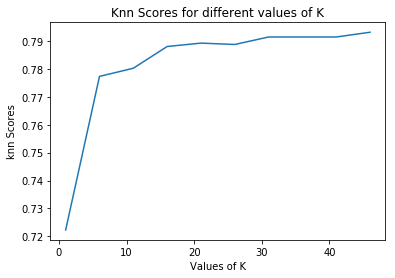

In [43]:
plt.plot(k_, score)
plt.xlabel("Values of K")
plt.ylabel("knn Scores")
plt.title("Knn Scores for different values of K")
plt.show()

One thing is for sure. As we increase K, we tend to **underfit** the model. And as we decrease k, we tend to **overfit** the model. Considering this, the best value of k seems to be between **16 and 25**.

**Logistic Regression**

In [44]:
# Instantiate a linear regression object
lg = linear_model.LogisticRegression()
# fit and train the model
lg.fit(X_train, y_train)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
# Get the score of the model
print("Logistic Regression Model Score: {}".format(lg.score(X_valid, y_valid)))

Logistic Regression Model Score: 0.7854181906851987


**Support Vector Machine (SVM)**

In [46]:
from sklearn import svm

# Instantiate a svm object
clf = svm.SVC(kernel='rbf', C=0.8, gamma=0.1)
# Fit and train the model
clf.fit(X_train, y_train)
print("svm score: {}".format(clf.score(X_valid, y_valid)))

svm score: 0.7937088514996342


## Results

The three models are close to each other regarding to the scores. We will choose the **Support Vector Machine** since it seems to perform a little better than the others.

**Preparing test datas for predictions**

In [47]:
# Import the values of the test datas into a dataframe
test_data = pd.read_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/AW_test.csv")

In [48]:
# We apply the same transformations we did for the training datas

categorical_columns = ['Gender', 'Occupation', 'Education']

Features_test = encode_string(test_data['MaritalStatus'])
for col in categorical_columns:
    temp = encode_string(test_data[col])
    Features_test = np.concatenate([Features_test, temp], axis = 1)


test_data['Year_of_birth'] = test_data['BirthDate'].str.split("/").str[2]
test_data['Year_of_birth'] = test_data['Year_of_birth'].astype(float)
test_data['Age'] = 1998 - test_data['Year_of_birth']

num_cols = ['HomeOwnerFlag', 'YearlyIncome', 'NumberChildrenAtHome', 'Age']
# We add the numeric columns to the Features_test

X_test = np.concatenate([Features_test, np.array(test_data[num_cols])], axis=1)
X_test[:, 15:] = scaler.transform(X_test[:, 15:])
#print(clf.predict(X_test))
predict = clf.predict(X_test)
print("Predictions for the test values:")
print("---------------------------------")
print(predict)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used

Predictions for the test values:
---------------------------------
[0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 

In [49]:
# Store the predictions in a dataframe
predict = pd.DataFrame(predict, columns=['Buyer'])

# Export this dataframe to a csv file
#predict.to_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/my_predictions.csv")

,Buyer
0,0
1,1
2,0
3,0
4,0


# Building a Regression Model to Predict Customer Purchasing Behavior.

Now we will create a regression model that predicts the average monthly spend of new customers. For now, we will keep the same feaure variables,  and just change the target variable.

In [50]:
# Genererate the target variable y_
y2 = aw_avupdated['AveMonthSpend']
# Keep the same feature variable X

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(Features, y2, train_size=0.75, test_size=0.25, random_state=0)
scaler2 = preprocessing.StandardScaler().fit(X_train2[:, 15:])
X_train2[:, 15:] = scaler2.transform(X_train2[:, 15:])
X_valid2[:, 15:] = scaler2.transform(X_valid2[:, 15:])

In this case too, there are many different algoriths which could help us predict the average monthly spend for new customers. We will try:
* Linear Regression Model
* KNN Regression Model

**Linear Regression**

In [51]:
# Define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [52]:
# Get the score of our model
print("Linear Regression Model Score: {}".format(lin_mod.score(X_valid2, y_valid2)))

Linear Regression Model Score: 0.9471464205184366


In [53]:
# The feature test variables are the same we used previously (X_test)
# We can do the predictions for these values
predictions2 = lin_mod.predict(X_test)
print("The predicted average monthly spends for new customers are: ")
print("-------------------------------------------------------------")
print(predictions2)

The predicted average monthly spends for new customers are: 
-------------------------------------------------------------
[ 41.88378906 106.22460938  48.9609375   87.73339844  60.69140625
  43.73697515  95.12109375 127.8737793  102.58203125  56.5078125
  58.87744141  50.25        72.97070312  45.90437317  37.77514648
  51.57226562  84.92773438  73.36132812 111.69335938  59.77148438
  69.55664062  75.8203125  150.00561523  85.36914062  53.52148438
  75.14453125  86.96484375 116.60742188  77.98355936  62.55273438
  69.18652344  80.73155775  40.01664734  71.00772339 106.61914062
 104.24095154 149.02441406  92.53759766  59.65145874  87.4609375
  47.12841797  80.99609375  83.15722656  49.14404487  58.38085938
  76.06787109  61.59765625  87.59863281 117.21630859  79.87304688
  81.54785156  95.6456604   81.81567383  65.20703125  47.14401245
  76.24804688  57.91992188  75.94378662  64.37109375  70.7539978
  45.83007812  65.95507812  90.75390625  82.72265625  44.20825195
  81.375       83.3510

In [54]:
# Store the predicted values in a dataframe predict_df
predict_df = pd.DataFrame(predictions2, columns = ['Predicted_Average_Monthly_Spend'])
predict_df['Predicted_Average_Monthly_Spend'] = predict_df['Predicted_Average_Monthly_Spend'].apply(lambda x: round(x, 2))
predict_df.head()

,Predicted_Average_Monthly_Spend
0,41.88
1,106.22
2,48.96
3,87.73
4,60.69


In [55]:
# Export the predictions to a csv file
predict_df.to_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/my_predictions2.csv")

**KNN Regression**

In [64]:
from sklearn.neighbors import KNeighborsRegressor

knns = []
the_scores = []
for k in range(1, 50, 5):
    knn_regressor = KNeighborsRegressor(n_neighbors=k, weights='distance')
    knn_regressor.fit(X_train2, y_train2)
    knns.append(k)
    the_scores.append(knn_regressor.score(X_valid2, y_valid2))
    print("For k = {}, the score is {}".format(k, knn_regressor.score(X_valid2, y_valid2)))
# knn_regressor = KNeighborsRegressor(n_neighbors=12, weights='distance')
# knn_regressor.fit(X_train2, y_train2)
# print(knn_regressor.score(X_valid2, y_valid2))

For k = 1, the score is 0.9717353088369467
For k = 6, the score is 0.9801845536086412
For k = 11, the score is 0.9802858981663285
For k = 16, the score is 0.9801150256371295
For k = 21, the score is 0.9797151779175984
For k = 26, the score is 0.9793145199651316
For k = 31, the score is 0.978837661294561
For k = 36, the score is 0.9783237270045394
For k = 41, the score is 0.9779405720684602
For k = 46, the score is 0.9775434457491008


The best value of k seems to be around 12. We will say it's **12**.

## Results
The **KNN regression** seems to have a better performance than the **Logistic Regression** model. We will therefore use the knn regression with a value of k = 12.


In [66]:
knn_regressor = KNeighborsRegressor(n_neighbors=12, weights='distance')
knn_regressor.fit(X_train2, y_train2)
print("knn regression score is: {}".format(knn_regressor.score(X_valid2, y_valid2)))

knn regression score is: 0.9803691727635767


In [67]:
# Predict the average monthly spend with the knn regression model
knn_predictions = knn_regressor.predict(X_test)
print(knn_predictions)

[ 46.02024943 111.5592131   48.88209646  87.54083328  57.30465737
  48.38638679  96.65504787 143.18996775  93.73420705  54.62181788
  58.14413498  51.92563994  72.70485098  48.67861691  41.79868887
  52.70441384  84.39179957  72.95201881 100.81877287  57.16179457
  63.98772076  76.3444481  167.13770516  84.75664846  53.09980869
  68.24663763  86.83974643 119.33996494  76.82297233  59.75642307
  65.75972064  79.75150809  44.56963281  69.49414454  98.15132212
 100.85520783 165.43458303  96.13218146  54.46182593  86.49463717
  52.83573421  77.30555819  77.34949454  51.42722449  55.65384672
  77.44920383  56.29380049  74.92438244 121.27055075  79.73179581
  76.63257911  91.57593569  77.31514885  59.76582121  48.30501053
  76.4844966   58.67591846  71.83247472  62.30249752  64.97537298
  48.52267138  75.49881306  96.22023479  76.96228239  44.74091373
  73.38079264  77.35951617 152.63164297  62.77960051  99.26262044
  80.008874    63.86379046  94.97270128  48.05495242  65.30309237
  76.34730

In [68]:
# Store the predicted values in a dataframe knn_predict_df
knn_predict_df = pd.DataFrame(knn_predictions, columns = ['Predicted_Average_Monthly_Spend'])
knn_predict_df['Predicted_Average_Monthly_Spend'] = knn_predict_df['Predicted_Average_Monthly_Spend'].apply(lambda x: round(x, 2))
knn_predict_df.head()

,Predicted_Average_Monthly_Spend
0,46.02
1,111.56
2,48.88
3,87.54
4,57.30


In [69]:
# Export the predictions to a csv file
knn_predict_df.to_csv("C:/Users/user/Documents/1. E-Learning/2019 Program/FinalExam/knn_predictions.csv")